# Goodness of fit: Adjusted R-square and Bootstrapping to determine Standard Error of Regression Coefficient
> Analysis of multiple linear regression

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as py
from sklearn import linear_model
import random

Text(0, 0.5, 'y')

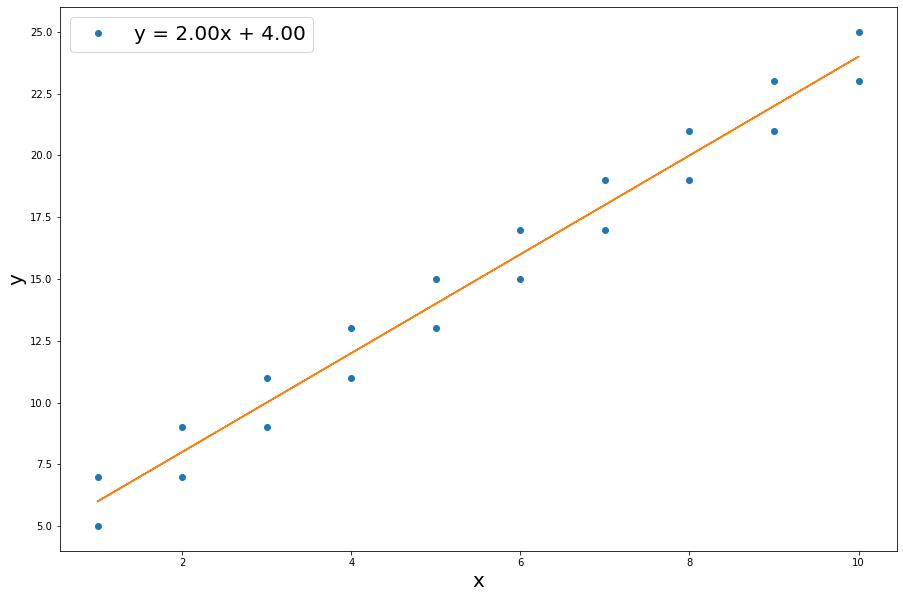

In [4]:
beta = 2
n=1
c1 = 3*n
c2 = 5*n
x = [1,2,3,4,5,6,7,8,9,10]
y1 = [i*beta+c1 for i in x]
y2 = [i*beta+c2 for i in x]

X = x+x
Y = y1+y2
Xdf = pd.DataFrame(X)
Ydf = pd.DataFrame(Y)
regr = linear_model.LinearRegression()
model = regr.fit(Xdf, Ydf)
line = model.coef_*Xdf+model.intercept_

fig = plt.figure(figsize=(15,10))
plt.plot(X,Y,'o', label = "y = {:.2f}x + {:.2f}".format(float(model.coef_),float(model.intercept_)))
plt.plot(X,list(line[0]))
plt.legend(loc="upper left", fontsize = 20)
plt.xlabel("x", fontsize=20)
plt.ylabel("y",  fontsize=20)

In [5]:
model.score(Xdf, Ydf), model.coef_, model.intercept_

(0.9705882352941176, array([[2.]]), array([4.]))

Text(0, 0.5, 'y')

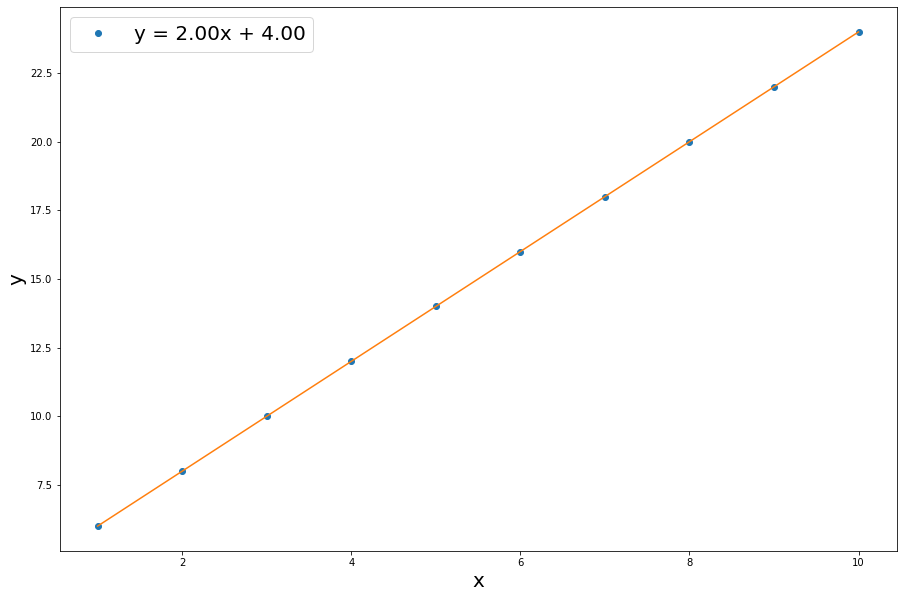

In [8]:
beta = 2
c = 4
x = [1,2,3,4,5,6,7,8,9,10]
y = [i*beta+c for i in x]

X = x
Y = y
Xdf = pd.DataFrame(X)
Ydf = pd.DataFrame(Y)
regr = linear_model.LinearRegression()
model = regr.fit(Xdf, Ydf)
line = model.coef_*Xdf+model.intercept_

fig = plt.figure(figsize=(15,10))
plt.plot(X,Y,'o', label = "y = {:.2f}x + {:.2f}".format(float(model.coef_),float(model.intercept_)))
plt.plot(X,list(line[0]))
plt.legend(loc="upper left", fontsize = 20)
plt.xlabel("x", fontsize=20)
plt.ylabel("y",  fontsize=20)

In [9]:
model.score(Xdf, Ydf), model.coef_, model.intercept_

(1.0, array([[2.]]), array([4.]))

# Adjusted R²

In [11]:
data = pd.read_csv("Fish.csv")
data

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [16]:
x = data[['Length1']]
x = data[['Length1','Length2']]
x = data[['Length1','Length2','Length3']]
x = data[['Length1','Length2','Length3','Height']]
x = data[['Length1','Length2','Length3','Height','Width']]
y = data['Weight']

regr = linear_model.LinearRegression()
model = regr.fit(x, y)
model.score(x, y), model.coef_, model.intercept_

(0.8852867046546207,
 array([ 62.35521443,  -6.52675249, -29.02621861,  28.29735132,
         22.47330665]),
 -499.58695535694187)

In [23]:
N = len(y)
k = 5

In [24]:
adj_Rsq = 1 - (((1 - model.score(x, y))*(N-1))/(N-k-1))
adj_Rsq

0.8815379041531377